In [1]:
import requests
from bs4 import BeautifulSoup

In [55]:
url = requests.get('https://www.sports-reference.com/cfb/schools/michigan/passing.html')
soup = BeautifulSoup(url.text, 'html.parser')

In [56]:
table = soup.find('div', attrs = {'id' : 'div_passing'}).find('table').find('tbody')

In [57]:
#list initialization
lst_name = []
lst_cmp = []
lst_size =[]
lst_rtng = []

In [58]:
rows = table.find_all('tr')
#for loop
for row in rows:
  columns = row.find_all('td')

  if len(columns) > 0:
    name = columns[0].find('a').text
    lst_name.append(name)
    yearsActive = columns[1].text + "-" + columns[2].text
    cmp = float(columns[3].text)
    pct = round(float(columns[5].text), 1)

    #Attributed Player Ratings
    if(columns[11].text != ''):
      rtng = float(columns[11].text)
    elif(columns[11].text == ''):
      rtng = float(0.00) #Data Cleaning Available

    lst_rtng.append(rtng)
    lst_cmp.append(cmp)
    cfb = [name, yearsActive, cmp, pct, rtng]
    print(cfb)


['Chad Henne', '2004-2007', 828.0, 59.7, 133.9]
['John Navarre', '2000-2003', 744.0, 56.1, 126.0]
['Devin Gardner', '2010-2014', 475.0, 60.4, 138.3]
['Denard Robinson', '2009-2012', 427.0, 57.2, 138.6]
['J.J. McCarthy', '2021-2023', 482.0, 67.6, 160.5]
['Elvis Grbac', '1989-1992', 476.0, 63.1, 148.7]
['Shea Patterson', '2018-2019', 424.0, 60.1, 144.2]
['Todd Collins', '1991-1994', 431.0, 65.0, 146.5]
['Jim Harbaugh', '1983-1986', 368.0, 63.2, 149.5]
['Tom Brady', '1996-1999', 395.0, 61.9, 134.9]
['Steve Smith', '1980-1983', 300.0, 50.1, 126.2]
['Rick Leach', '1975-1978', 220.0, 47.6, 136.3]
['Brian Griese', '1995-1997', 307.0, 59.5, 130.6]
['Wilton Speight', '2015-2017', 257.0, 58.8, 132.2]
['Cade McNamara', '2020-2022', 267.0, 63.1, 139.4]
['Jake Rudock', '2015-2015', 249.0, 64.0, 141.5]
['Scott Dreisbach', '1995-1998', 208.0, 54.7, 126.0]
['Tate Forcier', '2009-2010', 219.0, 60.0, 128.6]
['John Wangler', '1976-1980', 179.0, 56.3, 139.4]
['Drew Henson', '1998-2000', 196.0, 55.8, 135.5

In [59]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb

In [60]:
playerinfo = {"NAME": lst_name,
              "CMP": lst_cmp,
              "RTNG": lst_rtng}
len(playerinfo['NAME'])

for i in range(len(playerinfo["NAME"])-1):
  lst_size.append(i)

df = pd.DataFrame(data=playerinfo)
df.rename(columns={"NAME": "Players", "CMP": "Completions", "RTNG": "Rating" }, inplace=True)
df.head()

,Players,Completions,Rating
0,Chad Henne,828.0,133.9
1,John Navarre,744.0,126.0
2,Devin Gardner,475.0,138.3
3,Denard Robinson,427.0,138.6
4,J.J. McCarthy,482.0,160.5


In [61]:
df.dropna(subset="Rating", inplace=True)
len((df["Rating"].isna())==False) #count how many !NaN

df['Rating'][105]

0.0

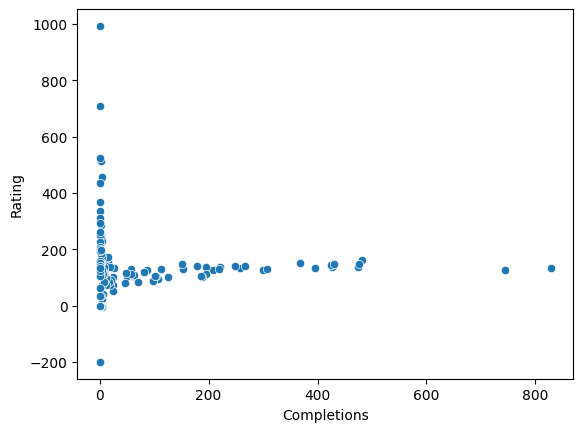

In [62]:
df_scatter = sb.scatterplot(data=df, x="Completions", y="Rating")

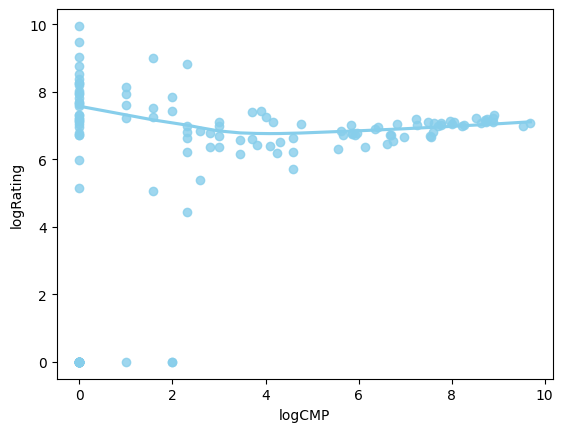

In [75]:
df["logCMP"] = np.log2(df["Completions"].clip(1))
df["logRating"] = np.log2(df["Rating"].clip(1))
dfg = sb.regplot(data=df, x="logCMP", y="logRating",color="skyblue", lowess=True)

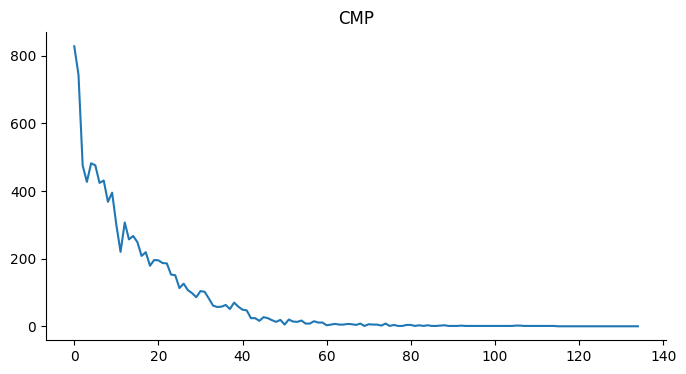

In [51]:
from matplotlib import pyplot as plt
df['CMP'].plot(kind='line', figsize=(8, 4), title='CMP')
plt.gca().spines[['top', 'right']].set_visible(False)